<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Nikita

Last Name: Senyatkin

Group: BASB-2 2022

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [Majid-Sohrabi](https://github.com/Majid-Sohrabi), [abdalazizrashid](https://github.com/abdalazizrashid) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [119]:
# !wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

In [120]:
import warnings 
warnings.filterwarnings('ignore')

In [121]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [122]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data[data['Survived']==1].groupby('Pclass')['Survived'].count()/data.groupby('Pclass')['Survived'].count()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2 (1 point)

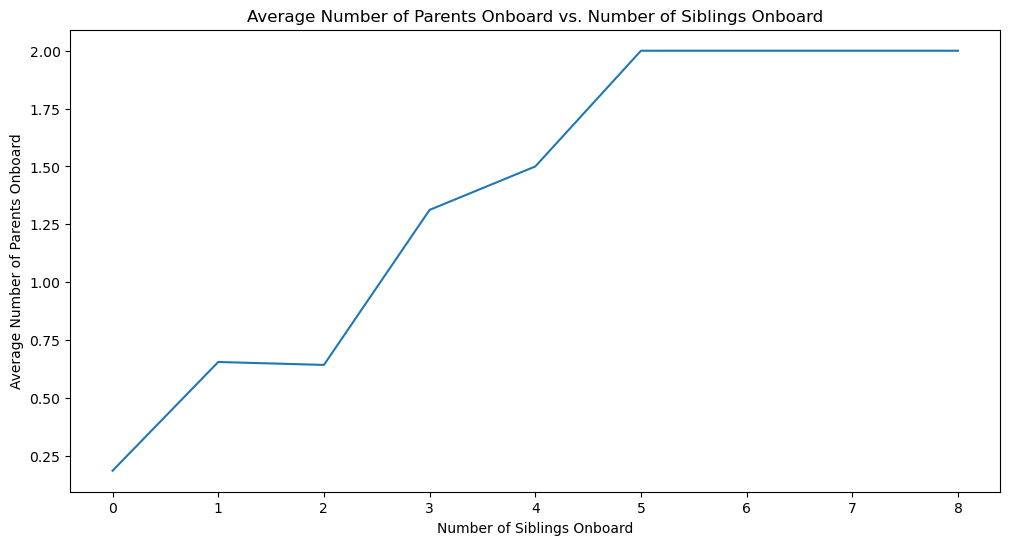

In [123]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

tmp_data = data.groupby('SibSp')['Parch'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tmp_data['SibSp'], tmp_data['Parch'])
ax.set_title('Average Number of Parents Onboard vs. Number of Siblings Onboard')
ax.set_xlabel('Number of Siblings Onboard')
ax.set_ylabel('Average Number of Parents Onboard')

plt.show()


## Task 3 (2 points)

In [124]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  
  dataset = dataset.copy()
  dataset['Age'].fillna(data['Age'].median(), inplace=True)
  age_dummies= pd.get_dummies(pd.cut(dataset.Age, 3, labels=['young', 'midage', 'old']))
  dataset = pd.concat([dataset, age_dummies], axis=1)
  features = dataset[['young', 'midage', 'old', 'Fare', 'Parch']]
  # E.g.:
#   features = dataset[["Fare", "Parch", "SibSp"]].copy()
#   features["Fare"] /= features["Fare"].mean()
#   features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    n_neighbors=30
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.76


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [129]:
from sklearn.model_selection import train_test_split

# <YOUR CODE>

results = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(
        feature_selection_and_preprocessing(data),
        data['Survived'],
        test_size=100/data.shape[0])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
results


##results in hist will be at the next paragraph



[0.76,
 0.59,
 0.68,
 0.66,
 0.64,
 0.66,
 0.6,
 0.71,
 0.61,
 0.73,
 0.57,
 0.65,
 0.74,
 0.65,
 0.55,
 0.71,
 0.65,
 0.63,
 0.67,
 0.71,
 0.72,
 0.64,
 0.65,
 0.68,
 0.64,
 0.7,
 0.63,
 0.67,
 0.7,
 0.71,
 0.65,
 0.72,
 0.7,
 0.68,
 0.63,
 0.63,
 0.51,
 0.61,
 0.67,
 0.66,
 0.71,
 0.69,
 0.69,
 0.65,
 0.68,
 0.72,
 0.68,
 0.62,
 0.63,
 0.72,
 0.7,
 0.64,
 0.67,
 0.67,
 0.75,
 0.69,
 0.68,
 0.69,
 0.65,
 0.69,
 0.71,
 0.72,
 0.62,
 0.65,
 0.7,
 0.69,
 0.66,
 0.68,
 0.72,
 0.68,
 0.74,
 0.7,
 0.67,
 0.75,
 0.64,
 0.67,
 0.78,
 0.66,
 0.69,
 0.67,
 0.61,
 0.7,
 0.62,
 0.71,
 0.59,
 0.69,
 0.66,
 0.65,
 0.63,
 0.72,
 0.69,
 0.66,
 0.67,
 0.68,
 0.7,
 0.64,
 0.67,
 0.68,
 0.63,
 0.67,
 0.59,
 0.68,
 0.73,
 0.64,
 0.65,
 0.61,
 0.76,
 0.65,
 0.68,
 0.69,
 0.66,
 0.66,
 0.78,
 0.71,
 0.76,
 0.72,
 0.66,
 0.66,
 0.63,
 0.73,
 0.63,
 0.65,
 0.72,
 0.66,
 0.69,
 0.69,
 0.7,
 0.76,
 0.7,
 0.71,
 0.7,
 0.69,
 0.66,
 0.6,
 0.72,
 0.73,
 0.68,
 0.74,
 0.71,
 0.67,
 0.73,
 0.63,
 0.64,
 0.7,
 0.56,

Text(0.5, 0, 'Accuracy_score')

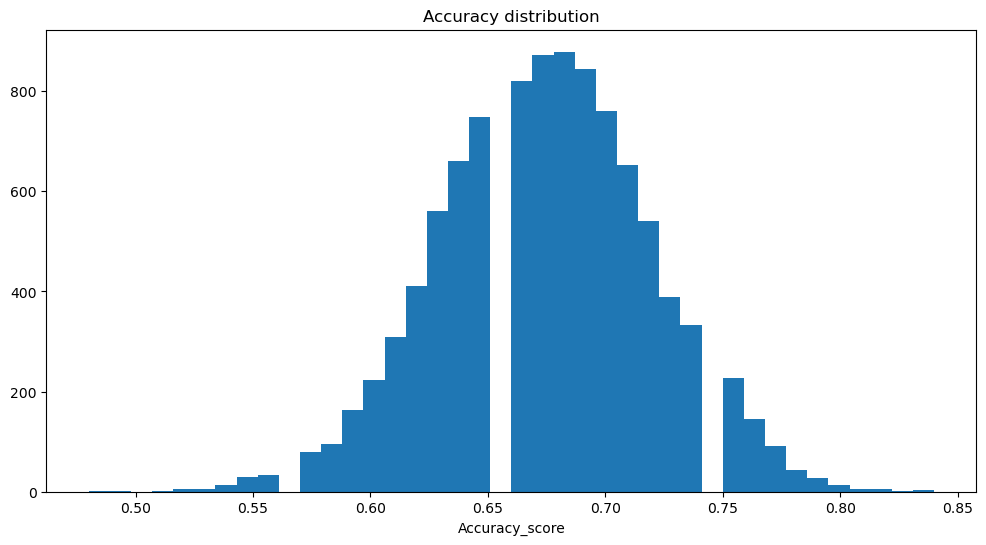

In [139]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(results,bins=40)
ax.set_title('Accuracy distribution')
ax.set_xlabel('Accuracy_score')


As we can see accuracy scores seek to be normally distributed due to the central limit theorem